## Mouvement d'un satellite géostationnaire (version professeur)

**Document :**

GOES-17 est le deuxième satellite de la génération actuelle de satellites météorologiques exploités par l'Administration nationale des océans et de l'atmosphère (NOAA). Il s'agit d'un satellite géostationnaire qui vise à fournir des images haute résolution visibles et infrarouges et des observations de la foudre sur plus de la moitié du globe. 
Le satellite a été lancé dans l'espace le 1er mars 2018 par un véhicule Atlas V (541) depuis la base aérienne de Cape Canaveral, en Floride. Il avait une masse de lancement de 5 192 kg (sa masse sèche (sans le carburant (ergols)) est de 2 857 kg). Le 12 mars, GOES-17 a rejoint GOES-16 (lancé en 2016) sur une orbite géosynchrone  à 35 786 km au-dessus de la Terre (soit un rayon orbital de 42 164 km). GOES-17 est devenu opérationnel le 12 février 2019 sous le nom de GOES-West. Sa durée de vie utile prévue est de 15 ans.

L'orbite géosynchrone est une orbite géocentrique sur laquelle un satellite dit géostationnaire se déplace dans le même sens que la Terre (d'ouest en est) et dont la période orbitale est égale à la période de rotation sidérale de la Terre (soit environ 23 h 56 min 4 s). Un satellite géostationnaire reste donc toujours à la verticale d'un même lieu sur Terre.

source : Wikipédia (texte remanié)

![Satellite](images/satellite.jpg)

![Orbite](images/orbites.png)

**Rappels mathématiques** : 

![Cercles](images/cercle.jpg)

Les coordonnées cartésiennes du point M décrivant un cercle de rayon R centré sur l'origine O du repère sont : 

$(x_M=R\times \cos{\theta}\;;\;y_M=R\times \sin{\theta})$

Le vecteur unitaire $\overrightarrow{u}=\frac{\overrightarrow{OM}}{OM}=\frac{\overrightarrow{OM}}{R}$ a pour coordonnées :
$\overrightarrow{u} \begin{pmatrix} \frac{x_M}{R}=\cos{\theta} \\ \frac{y_M}{R}=\sin{\theta} \end{pmatrix}$


**Problématique : Comment la force d'attraction gravitationnelle exercée par la Terre sur le satellite GOES-17 influence la variation de son vecteur vitesse?**


L'étude du mouvement du satellite GOES-17 aura lieu dans le référentiel géocentrique supposé galiléen auquel on associe un repère cartésien orthonormé fixe dont l'origine est au centre de la Terre.

1. Quelle est la nature du mouvement du satellite GOES-17 ? (Répondre dans la cellule ci-dessous en double-cliquant dessus si besoin).

2. En vous basant sur vos connaissances issues de la classe de seconde (en physique et en programmation), réfléchir aux différentes parties que comportera le programme permettant de répondre à la problématique. (Répondre dans la cellule ci-dessous en double-cliquant dessus si besoin).

- codage de la trajectoire du satellite (cellule 2)
- codage des coordonnées du vecteur vitesse (cellule 3)
- codage des coordonnées du vecteur variation de vitesse (cellule 4)
- codage des coordonnées du vecteur force d'attraction gravitationnelle (cellule 5)
- affichage d'un graphique représentant la trajectoire, le vecteur variation de vitesse du satellite et le vecteur force d'attraction gravitationnelle (cellule 6)

In [1]:
# cellule 1 : import des bibliothèques

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

3. A l'aide du document, déterminer les valeurs du rayon R de la trajectoire et la période de révolution T du satellite (lignes 3 et 4 de la cellule 2).

4. Quelle valeur en radian prend l'angle $\theta$ lorsqu'il est parcouru par le segment OM en une période T? (Répondre dans la cellule ci-dessous en double-cliquant dessus si besoin).

**note codage LaTeX** : double-cliquer sur cette cellule pour voir comment coder l'écriture des lettres grecques :

- théta : $\theta$
- pi: $\pi$

5. En déduire l'expression de l'angle $\theta$ en fonction du temps t et de la période T (ligne 8 de la cellule 2).

6. En déduire les coordonnées x et y de la position du satellite en vous aidant des rappels mathématiques (lignes 10 et 11 de la cellule 2).

**Note codage : la constante pi ainsi que les fonctions cos et sin sont fournies par la bibliothèque numpy** :
- np.pi
- np.cos()
- np.sin()

In [2]:
# cellule 2 : coordonnées de la position du satellite

R=42164000   # rayon en m
T=84164      # période de révolution en s

t=np.arange(0,84164,500)   

theta=2*np.pi/T*t

x=R*np.cos(2*np.pi/T*t)
y=R*np.sin(2*np.pi/T*t)

Afin de calculer les coordonnées du vecteur vitesse, **notées vx et vy** on crée une fonction **coordvit(u)** :

   - **u** est une liste et représente une des coordonnées (x ou y) du vecteur position. 
   - **vu** est une liste et représente une des coordonnées (vx ou vy) du vecteur vitesse.
   - **vui** est la valeur à l'instant $t_i$ de la coordonnée étudiée du vecteur vitesse. La liste **vu** contiendra ces valeurs **vui**.

7. Compléter la ligne 6 de la cellule 3 permettant de calculer les valeurs **vui** prises par la coordonnée **vu** du vecteur vitesse à chaque instant du mouvement.

**Note codage : la variable t est déclarée dans le programme principal et est donc globale. Elle est ainsi reconnue au sein de toute fonction...**

**On rappelle que la $i^{ème}$ valeur d'une liste u est codée u[i]** 

8. Ecrire les deux lignes de code permettant de calculer les valeurs des coordonnées **vx** et **vy** (lignes 10 et 11 de la cellule 3). 

In [3]:
# cellule 3 : coordonnées du vecteur vitesse du satellite

def coordvit(t,u):
    vu=[]
    for i in range (len(u)-1):
        vui=(u[i+1]-u[i])/(t[i+1]-t[i])
        vu.append(vui)
    return(vu)

vx=coordvit(t,x)
vy=coordvit(t,y)

On appelle vecteur variation de vitesse au temps $t_i$, le vecteur : $\overrightarrow{\Delta v}(t_i)=\overrightarrow{v}(t_{i+1})-\overrightarrow{v}(t_{i})$.

On désire calculer les coordonnées notées dvx et dvy du vecteur $\overrightarrow{\Delta v}$

9. En vous basant sur le modèle de la fonction précédente, créer une fonction **coordvarvit(vu)** permettant de calculer les valeurs d'une coordonnée notée **dvu** du vecteur variation de vitesse (lignes 3 à 8 de la cellule 4).

10. Ecrire les deux lignes de code permettant de calculer les valeurs des coordonnées **dvx** et **dvy** (lignes 10 et 11 de la cellule 4). 

In [4]:
# cellule 4 : coordonnées du vecteur variation de vitesse

def coordvarvit(vu):
    dvu=[]
    for j in range (len(vu)-1):
        dvuj=vu[j+1]-vu[j]
        dvu.append(dvuj)
    return(dvu)

dvx=coordvarvit(vx)
dvy=coordvarvit(vy)

11. A l'aide du document, déterminer la valeur de la masse m du satellite après avoir consommé 1000 kg de carburant (ligne 4 de la cellule 5).

12. Donner l'expression vectorielle de la force d'attraction gravitationnelle exercée par la Terre sur le satellite $\overrightarrow{F_{T/S}}$ en fonction de G, $M_T$, m, R et $\overrightarrow{u}$. (Répondre dans la cellule ci-dessous en double-cliquant dessus si besoin).

$\overrightarrow{F_{T/S}}=-G\times\frac{M_T\times m}{R^2}\times \overrightarrow{u}$

**note codage LaTeX** : double-cliquer sur cette cellule pour voir comment coder l'écriture :

- d'un vecteur : $\overrightarrow{vecteur}$ ou $\vec{vecteur}$

- d'une fraction : $\frac{numérateur}{dénominateur}$

- d'un indice : $x_{indice}$

- d'un exposant : $y^{exposant}$

- d'un signe x : $\times$

13. Déterminer les expressions des coordonnées Fx et Fy de la force d'attraction gravitationnelle exercée par la Terre sur le satellite en vous aidant de vos connaissances et des rappels mathématiques (lignes 7 et 8 de la cellule 5).

In [5]:
# cellule 5 : coordonnées du vecteur 
# force d'attraction gravitationnelle

MT=5.972*10**24          # masse de la Terre en kg
m=4192                   # masse du satellite en kg
G=6.67408*10**(-11)      # constante de gravitation universelle 
                         # en m^3.kg^-1.s^-2

Fx=(G*MT*m/(R**2))*(-x/R)
Fy=(G*MT*m/(R**2))*(-y/R)

14. Compléter la ligne de code 4 permttant d'afficher la trajectoire du satellite.

15. Compléter les lignes de code 5, 6 et 9 (et éventuellement 10) afin d'afficher les légendes des axes et le titre du graphique.

16. Sur le modèle des lignes de code 13 et 14, compléter les lignes de code 15 et 16 permettant de tracer le vecteur force d'attraction gravitationnelle.

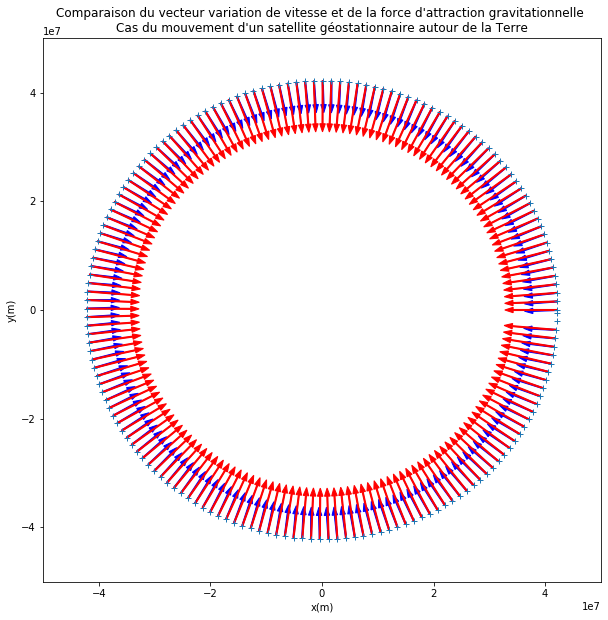

In [6]:
# cellule 6 : Tracé du graphique permettant de visualiser 
# la trajectoire du satellite ainsi que  les 
# vecteurs variation de vitesse et force d'attraction gravitationnelle.

plt.figure (figsize=(10,10))
plt.plot(x,y,'+')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.xlim(-50000000,50000000)
plt.ylim(-50000000,50000000)
plt.title ("Comparaison du vecteur variation de vitesse "
           "et de la force d'attraction gravitationnelle \n" 
           "Cas du mouvement d'un satellite géostationnaire "
           "autour de la Terre")

for k in range(len(dvx)):
    plt.arrow(x[k],y[k],50000*dvx[k],50000*dvy[k],
              facecolor='b',edgecolor='b',width=200000,
              head_width=1000000,length_includes_head=True)
    plt.arrow(x[k],y[k],10000*Fx[k],10000*Fy[k],
              facecolor='r',edgecolor='r',width=200000,
              head_width=1000000,length_includes_head=True)
plt.show()

17. Conclusion : Répondre à la problématique dans la cellule suivante en double-cliquant dessus si besoin.

Remarque : si la direction du vecteur force et celle du vecteur variation de vitesse sont trop différentes, c'est que les vecteurs vitesses moyennes sont trop différents des vecteurs vitesses instantanées. Il suffit de diminuer la durée entre deux positions successives du satellite afin de réduire cette différence. (cf. la définition mathématique de la dérivée)